In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = 'training_set'
test = 'test_set'

# Load the combined dataset
combined_ds = tf.keras.utils.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size=32
)

# Split the combined dataset into training and validation datasets
train_ds = combined_ds.take(round(0.8 * len(combined_ds)))
val_ds = combined_ds.skip(round(0.8 * len(combined_ds)))

# Load the test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
  test,
  seed=123,
  image_size=(256,256),
  batch_size=32
)


Found 8005 files belonging to 1 classes.
Using 6404 files for training.
Found 2023 files belonging to 1 classes.


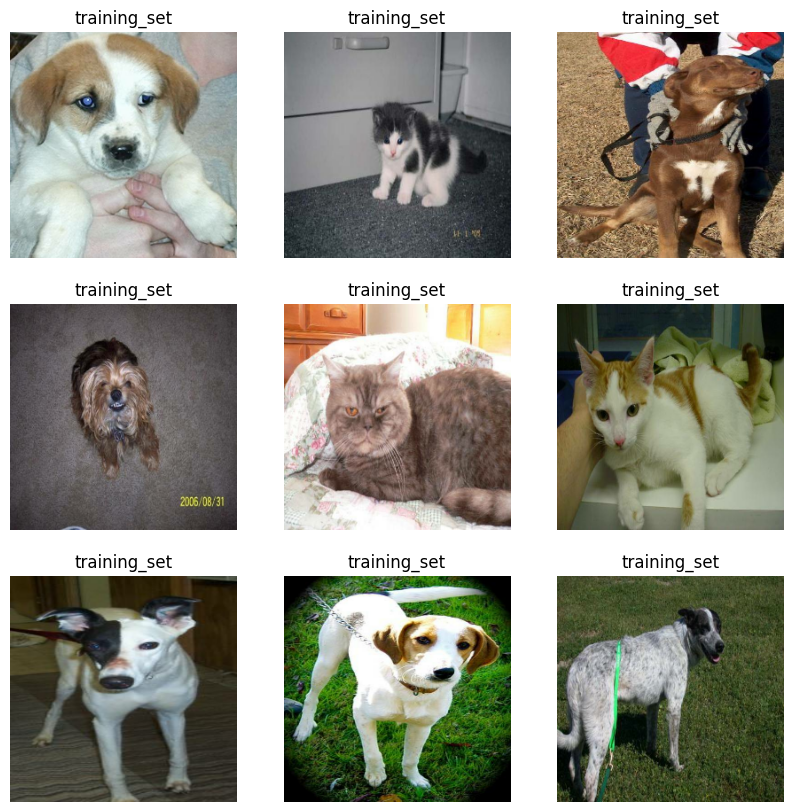

In [11]:
image_batch, label_batch = next(iter(train_ds))
class_names = combined_ds.class_names


plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [12]:
cnn = models.Sequential([

    layers.Rescaling(1./255),

    # cnn
    layers.Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), input_shape = (256,256,3)),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(12, activation = 'softmax'),
])

In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Train the model using the training dataset
cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=6
)

# Evaluate the model on the test dataset
evaluation_results = cnn.evaluate(test_ds)
loss = evaluation_results[0]
accuracy = evaluation_results[1]

print(f"Loss = {loss}\nAccuracy = {accuracy}")

# Predict labels for the test dataset
predicted_labels = np.argmax(cnn.predict(test_ds), axis=-1)

# Get true labels from the test dataset
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())

Epoch 1/6


161/161 [==============================] - 2228s 14s/step - loss: 0.0156 - accuracy: 0.9938 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/6
161/161 [==============================] - 2391s 15s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/6
 27/161 [====>.........................] - ETA: 2:14:48 - loss: 0.0000e+00 - accuracy: 1.0000